# K Nearest Neighbors - Ejemplo Python
### Carlos Velázquez, Estudiante de Maestría en Ciencia de Datos
K Nearest Neighbors es un método de clasificación no-paramétrico cuyo proposito es usar una base de datos en la cual los puntos de datos están separados en diferentes clases para predecir la clasificación de una nueva instancia/registro. 

A grandes rasgos, el algoritmo intenta predecir la clase correcta para los datos de prueba calculando la distancia entre los datos de prueba y todos los puntos de entrenamiento. Despues, selecciona el número K de puntos que estén mas cercanos a los datos de prueba. El algoritmo calcula la probabilidad de que los datos de prueba pertenezcan a las clases de 'K' datos de entrenamiento y se seleccionará la clase que tenga la mayor probabilidad. En el caso de la regresión, el valor es la media de los 'K' puntos de entrenamiento seleccionados.

El pseudocódigo del algoritmo es el siguiente:

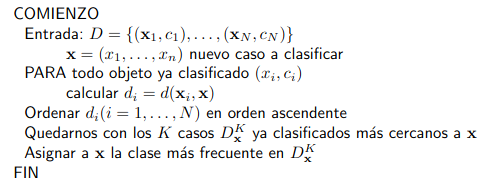

Actualmente el algoritmo de K-Nearest-Neighbors se aplica en sistemas de recomendación, categorización de textos, predicción de caregoría de malware, entre otros. 
En este Notebook, utilizaremos el Dataset de Calidad de Vino, obtenido de UCI Machine Learning Repository.(https://archive.ics.uci.edu/ml/datasets/wine+quality), con este dataset predeciremos la clasificación de calidad de un vino con base en sus caracteristicas fisicoquímicas.

In [40]:
#Importamos las librerias necesarias
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Leemos el archivo
df = pd.read_csv('/home/carlos/Downloads/winequality-red.csv', sep = ';')

In [60]:
#Observamos el head del DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Baja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Baja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Baja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Media
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Baja


In [9]:
#confirmaremos que no haya valores nulos/perdidos
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
#Recodificaremos la variable calidad para agruparla en calidad baja, media y alta
dict_map = {3:"Baja",
           4:"Baja",
           5:"Baja",
           6:"Media",
           7:"Alta",
           8:"Alta",
           9:"Alta"}
df['quality'] = df['quality'].replace(dict_map)

In [18]:
#Confirmamos que se recodificó
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Baja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Baja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Baja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Media
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Baja


In [19]:
#Definimos X(todas las columnas menos el label), y(label, que es quality)
X = np.array(df.drop(['quality'], 1))#Features
y = np.array(df['quality'])#Labels

In [30]:
#Separamos los datos en conjuntos de entrenamiento y de prueba, defiendo 20% para prueba y 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:

clf = neighbors.KNeighborsClassifier()

#Ajustamos el clasificador de KNN a partir del conjunto de datos de entrenamiento.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
#Obtenemos la precisión con los datos de prueba 
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.546875


In [56]:
#Debido a que la precisión es algo baja, calcularemos los vecinos mas cercanos ideales para aumentarla.
#Calculando vecinos ideales
acc = []

#Calculando hasta 100 vecinos mas cercanos
for i in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    acc.append(accuracy)

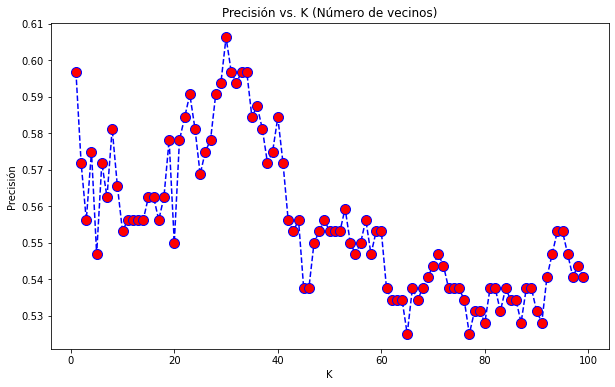

Número ideal de vecinos: 29
Precisión: 0.60625


In [55]:
#Graficando 
plt.figure(figsize=(10,6))
plt.plot(range(1,100), acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Precisión vs. K (Número de vecinos)')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.show()
print("Número ideal de vecinos:",acc.index(max(acc)))
print("Precisión:",max(acc))

In [57]:
#Ya que tenemos el numero ideal de vecinos podemos establecer el modelo
clf = neighbors.KNeighborsClassifier(n_neighbors = 29)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
acc.append(accuracy)

In [58]:
#Haciendo prediccion
example_measures = np.array([11,0.70,0.00,2,0.076,10.0,30.0,0.9978,3,0.56,8])
example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
print(prediction)

['Baja']


### Referencias y Links de interés

* Clasificadores K-NN, para mas información del pseudocódigo - http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t9knn.pdf
* K-Nearest Neighbor, para más información del algoritmo y su aplicación en python - https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4